# 9.0 Exploratory Data Analysis

[Exploratory data analysis (EDA)](https://www.ibm.com/cloud/learn/exploratory-data-analysis) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

**Essential Steps in EDA:**

- Data Cleaning
- Data Summary and visualization
    - Descriptive Statistics: Calculate basic statistics like mean, median, mode, standard deviation, and variance to summarize and describe the data.
    - Data visualization: Create visual representations of the data, such as bar charts, histograms, scatter plots, and box plots, to help identify patterns and relationships.
        - Distributions
        - Outliers
    - Handling Missing Data
    - Data formatting
    - Transformation
- Encoding and featurization (feature engineering)

**Exploratory data analysis tools**:
    
- **Clustering and dimension reduction** techniques, which help create graphical displays of high-dimensional data containing many variables.
- **Univariate visualization** of each field in the raw dataset, with summary statistics.
- **Bivariate visualizations** and summary statistics that allow you to assess the relationship between each variable in the dataset and the target variable you’re looking at.
- **Multivariate visualizations**, for mapping and understanding interactions between different fields in the data.


### EDA Revision Hands-on

> EDA on the `Employee Sample Data.xlsx` dataset. 

# 9.1 Interactive Data Visualization with Plotly

The [plotly Python library](https://plotly.com/python/) is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

In [2]:
import plotly.graph_objects as go
import pandas as pd

- **Stem-and-leaf plots**, which show all data values and the shape of the distribution.
- **Histograms**, a bar plot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values.
- **Box plots**, which graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum.
- **Scatter plot**, which is used to plot data points on a horizontal and a vertical axis to show how much one variable is affected by another.
- **Multivariate chart**, which is a graphical representation of the relationships between factors and a response.
- **Run chart**, which is a line graph of data plotted over time.
- Bubble chart, which is a data visualization that displays multiple circles (bubbles) in a two-dimensional plot.
- **Heat map**, which is a graphical representation of data where values are depicted by color.



Let's get our feet wet by jumping into an introductory problem.

We are going to use a pulicly available dataset: [Covid-19 Africa historic data](https://africaopendata.org/dataset/covid-19-in-africa/resource/663b18a5-af4a-4af3-b1a0-53b839085934?view_id=5dc25e23-4fe0-421e-a6a0-d3a5ec677ef1)

Pandas also allows us to load data from a url.

In [3]:
url = "https://raw.githubusercontent.com/CodeForAfrica/covid19-in-africa/master/datasets/africa_historic_data.csv"
covid_history_africa = pd.read_csv(url)
# you can also load it from "datasets/covid_history_africa.csv"
# or use data/inflation_interest_unemployment.csv
covid_history_africa

Country/Region        Date  Confirmed  Deaths  Recovered
0            Algeria  12-31-2022     271228    6881          0
1             Angola  12-31-2022     105095    1930          0
2              Benin  12-31-2022      27982     163          0
3           Botswana  12-31-2022     327860    2794          0
4       Burkina Faso  12-31-2022      22006     395          0
...              ...         ...        ...     ...        ...
61717           Togo  01-01-2021       3662      68       3443
61718        Tunisia  01-01-2021     140557    4730     105499
61719         Uganda  01-01-2021      35511     265      11878
61720         Zambia  01-01-2021      20997     390      18773
61721       Zimbabwe  01-01-2021      14084     369      11347

[61722 rows x 5 columns]

In [4]:
covid_history_africa.describe()

Confirmed         Deaths     Recovered
count  6.172200e+04   61722.000000  6.172200e+04
mean   1.247213e+05    2814.650092  1.765896e+04
std    4.013185e+05   10575.661105  1.051551e+05
min    0.000000e+00       0.000000  0.000000e+00
25%    4.762500e+03      73.000000  0.000000e+00
50%    1.882250e+04     294.000000  0.000000e+00
75%    8.605400e+04    1459.000000  3.141750e+03
max    4.067067e+06  102595.000000  2.258603e+06

In [5]:
fig = go.Figure(
    data=go.Scatter(
        y=covid_history_africa["Recovered"],
        x=covid_history_africa["Country/Region"]
        )
    )
fig.show()

- Organize data into countries
- Explore trends (cumulatives, etc)
- Clustering of countries by data

In [6]:
import plotly.express as px

In [7]:
def remux_date(m_d_y):
  y_m_d = m_d_y.split("-")
  return y_m_d[2]+"-"+y_m_d[0]+"-"+y_m_d[1]

def rotate_list(l, n):
  return l[n:] + l[:n]

def shift_list(l, n=1, fill=0):
  return ([fill]*n) + l[:-n]

In [8]:
shift_list([1,2,3,4,5,6])

[0, 1, 2, 3, 4, 5]

In [9]:
data = px.scatter(
    covid_history_africa,
    x="Date",
    y="Recovered",
    color="Country/Region",
    title="Africa Covid History",
    )
fig = go.Figure(data=data, layout={"type":"date"})
fig.show()

### Data cleaning and reformating

In [10]:
# create serial date
covid_history_africa["Serial Date"] = covid_history_africa.apply(lambda x: remux_date(x["Date"]), axis=1)

In [11]:
data = px.scatter(
    covid_history_africa,
    x="Serial Date",
    y="Recovered",
    color="Country/Region",
    title="Africa Covid History",
    )
fig = go.Figure(data=data, layout={"type":"date"})
fig.show()

To create a plot with country maps we need to install a package called `geopandas`

In [12]:
# # if you are using a conda environment, you can easily install with the next line
# !conda install --channel conda-forge geopandas

# # else, use this. (This might fail if some dependencies are not installed)
# !pip install geopandas

In [13]:
# group data by countries
countries_grouped = covid_history_africa.groupby("Country/Region").max().reset_index()
countries_grouped

Country/Region        Date  Confirmed  Deaths  Recovered  \
0                    Algeria  12-31-2022     271496    6881     118409   
1                     Angola  12-31-2022     105288    1933      39582   
2                      Benin  12-31-2022      27999     163       8136   
3                   Botswana  12-31-2022     329758    2876      96964   
4               Burkina Faso  12-31-2022      22056     396      13385   
5                    Burundi  12-31-2022      53631      38        773   
6                 Cabo Verde  12-31-2022      63244     413      33173   
7                   Cameroon  12-31-2022     124392    1965      35261   
8   Central African Republic  12-31-2022      15368     113       6859   
9                       Chad  12-31-2022       7679     194       4796   
10                   Comoros  12-31-2022       9008     161       3873   
11       Congo (Brazzaville)  12-31-2022      25375     388      12421   
12          Congo (Kinshasa)  12-31-2022      95749    1464      30043   
13             Cote d'Ivoire  12-31-2022      88263     834      49642   
14                  Djibouti  12-31-2022      15690     189      11491   
15                     Egypt  12-31-2022     515759   24812     232179   
16         Equatorial Guinea  12-31-2022      17229     183       8709   
17                   Eritrea  12-31-2022      10189     103       6475   
18                  Eswatini  12-31-2022      74267    1425      22127   
19                  Ethiopia  12-31-2022     500116    7572     264008   
20                     Gabon  12-31-2022      48981     306      25228   
21                    Gambia  12-31-2022      12598     372       7310   
22                     Ghana  12-31-2022     171229    1462      98633   
23                    Guinea  12-31-2022      38267     467      24463   
24             Guinea-Bissau  12-31-2022       8960     176       4027   
25                     Kenya  12-31-2022     342937    5688     191188   
26                   Lesotho  12-31-2022      34790     723       6664   
27                   Liberia  12-31-2022       8090     295       2715   
28                     Libya  12-31-2022     507187    6437     195639   
29                Madagascar  12-31-2022      67889    1423      41177   
30                    Malawi  12-31-2022      88707    2896      39841   
31                      Mali  12-31-2022      33062     743      13962   
32                Mauritania  12-31-2022      63668     997      22859   
33                 Mauritius  12-31-2022     296042    1044       1854   
34                   Morocco  12-31-2022    1272490   16296     582692   
35                Mozambique  12-31-2022     233214    2242     100912   
36                   Namibia  12-31-2022     171156    4090      96568   
37                     Niger  12-31-2022       9508     315       5351   
38                   Nigeria  12-31-2022     266598    3155     165208   
39                    Rwanda  12-31-2022     133194    1468      44911   
40     Sao Tome and Principe  12-31-2022       6281      77       2365   
41                   Senegal  12-31-2022      88926    1988      48812   
42                Seychelles  12-31-2022      50665     172      17874   
43              Sierra Leone  12-31-2022       7760     126       4287   
44                   Somalia  12-31-2022      27324    1361       7661   
45              South Africa  12-31-2022    4067067  102595    2258603   
46               South Sudan  12-31-2022      18368     138      10514   
47                     Sudan  12-31-2022      63829    5017      30647   
48                  Tanzania  12-31-2022      42906     846        183   
49                      Togo  12-31-2022      39396     290      14654   
50                   Tunisia  12-31-2022    1151126   29341     530545   
51                    Uganda  12-31-2022     170544    3630      86826   
52                    Zambia  12-31-2022     343135    4057     189658   
53                

<Axes: xlabel='Country/Region'>

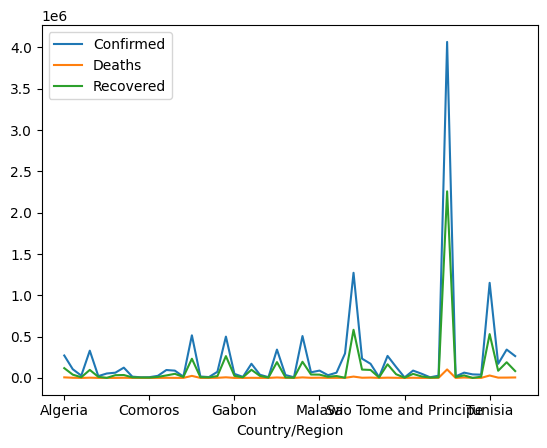

In [14]:
# We can also plot directly from the dataframe, using the following
#  'area',
#  'bar',
#  'barh',
#  'box',
#  'density',
#  'hexbin',
#  'hist',
#  'kde',
#  'line',
#  'pie',
#  'scatter

# for example
countries_grouped.plot.line(x="Country/Region")

In [15]:
# get countries information from an in-build dataset
countries_df = px.data.gapminder().query("year==2007")
countries_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

In [16]:
countries_and_iso = countries_df[["country", "iso_alpha"]]
countries_and_iso

country iso_alpha
11           Afghanistan       AFG
23               Albania       ALB
35               Algeria       DZA
47                Angola       AGO
59             Argentina       ARG
...                  ...       ...
1655             Vietnam       VNM
1667  West Bank and Gaza       PSE
1679         Yemen, Rep.       YEM
1691              Zambia       ZMB
1703            Zimbabwe       ZWE

[142 rows x 2 columns]

In [17]:
countries_grouped = countries_grouped.merge(countries_and_iso, left_on="Country/Region", right_on="country")

In [18]:
# plot results in a map
data = px.choropleth(
    countries_grouped,
    locations="iso_alpha",
    color="Recovered",
    scope="africa",
    title="Africa Covid History")
fig = go.Figure(data=data)
fig.show()


In [19]:
# single out a country
ng_covid_history = covid_history_africa[covid_history_africa["Country/Region"]=="Nigeria"]
ng_covid_history = ng_covid_history.sort_values("Serial Date")
ng_covid_history['Deaths Daily']= shift_list(ng_covid_history['Deaths'].tolist())
ng_covid_history['Deaths Daily']= ng_covid_history['Deaths']-ng_covid_history['Deaths Daily'] 
ng_covid_history

Country/Region        Date  Confirmed  Deaths  Recovered Serial Date  \
58304        Nigeria  01-22-2020          0       0          0  2020-01-22   
58088        Nigeria  01-23-2020          0       0          0  2020-01-23   
57872        Nigeria  01-24-2020          0       0          0  2020-01-24   
57656        Nigeria  01-25-2020          0       0          0  2020-01-25   
57440        Nigeria  01-26-2020          0       0          0  2020-01-26   
...              ...         ...        ...     ...        ...         ...   
49016        Nigeria  03-05-2023     266598    3155          0  2023-03-05   
48800        Nigeria  03-06-2023     266598    3155          0  2023-03-06   
48584        Nigeria  03-07-2023     266598    3155          0  2023-03-07   
48368        Nigeria  03-08-2023     266598    3155          0  2023-03-08   
48152        Nigeria  03-09-2023     266598    3155          0  2023-03-09   

       Deaths Daily  
58304             0  
58088             0  
57872             0  
57656             0  
57440             0  
...             ...  
49016             0  
48800             0  
48584             0  
48368             0  
48152             0  

[1143 rows x 7 columns]

In [20]:
data = px.scatter(
    ng_covid_history,
    x="Serial Date",
    y="Deaths Daily",
    title="Nigeria Covid History")
fig = go.Figure(data=data, layout={"xaxis": {"type":"date"}})
fig.show()

In [21]:
ng_covid_history['Recovered Daily']= shift_list(ng_covid_history['Recovered'].tolist())
ng_covid_history['Recovered Daily']= ng_covid_history['Recovered']-ng_covid_history['Recovered Daily'] 
ng_covid_history

Country/Region        Date  Confirmed  Deaths  Recovered Serial Date  \
58304        Nigeria  01-22-2020          0       0          0  2020-01-22   
58088        Nigeria  01-23-2020          0       0          0  2020-01-23   
57872        Nigeria  01-24-2020          0       0          0  2020-01-24   
57656        Nigeria  01-25-2020          0       0          0  2020-01-25   
57440        Nigeria  01-26-2020          0       0          0  2020-01-26   
...              ...         ...        ...     ...        ...         ...   
49016        Nigeria  03-05-2023     266598    3155          0  2023-03-05   
48800        Nigeria  03-06-2023     266598    3155          0  2023-03-06   
48584        Nigeria  03-07-2023     266598    3155          0  2023-03-07   
48368        Nigeria  03-08-2023     266598    3155          0  2023-03-08   
48152        Nigeria  03-09-2023     266598    3155          0  2023-03-09   

       Deaths Daily  Recovered Daily  
58304             0                0  
58088             0                0  
57872             0                0  
57656             0                0  
57440             0                0  
...             ...              ...  
49016             0                0  
48800             0                0  
48584             0                0  
48368             0                0  
48152             0                0  

[1143 rows x 8 columns]

In [22]:
data = px.scatter(
    ng_covid_history,
    x="Serial Date",
    y="Recovered Daily",
    title="Nigeria Covid History")
fig = go.Figure(data=data, layout={"xaxis": {"type":"date"}})
fig.update_layout(yaxis_range=[-1,12000])
fig.show()

In [23]:
ng_covid_history['Confirmed Daily']= shift_list(ng_covid_history['Confirmed'].tolist())
ng_covid_history['Confirmed Daily']= ng_covid_history['Confirmed']-ng_covid_history['Confirmed Daily'] 
ng_covid_history

Country/Region        Date  Confirmed  Deaths  Recovered Serial Date  \
58304        Nigeria  01-22-2020          0       0          0  2020-01-22   
58088        Nigeria  01-23-2020          0       0          0  2020-01-23   
57872        Nigeria  01-24-2020          0       0          0  2020-01-24   
57656        Nigeria  01-25-2020          0       0          0  2020-01-25   
57440        Nigeria  01-26-2020          0       0          0  2020-01-26   
...              ...         ...        ...     ...        ...         ...   
49016        Nigeria  03-05-2023     266598    3155          0  2023-03-05   
48800        Nigeria  03-06-2023     266598    3155          0  2023-03-06   
48584        Nigeria  03-07-2023     266598    3155          0  2023-03-07   
48368        Nigeria  03-08-2023     266598    3155          0  2023-03-08   
48152        Nigeria  03-09-2023     266598    3155          0  2023-03-09   

       Deaths Daily  Recovered Daily  Confirmed Daily  
58304             0                0                0  
58088             0                0                0  
57872             0                0                0  
57656             0                0                0  
57440             0                0                0  
...             ...              ...              ...  
49016             0                0                0  
48800             0                0                0  
48584             0                0                0  
48368             0                0                0  
48152             0                0                0  

[1143 rows x 9 columns]

In [24]:
# combine multiple plots into one

fig = go.Figure()

data1 = px.scatter(
    ng_covid_history,
    x="Serial Date",
    y="Confirmed Daily",
    color=["Confirmed"]*len(ng_covid_history),
    color_discrete_sequence=["blue"]*len(ng_covid_history),
    opacity=0.6,
    )
fig.add_traces(list(data1.select_traces()))
data2 = px.scatter(
    ng_covid_history,
    x="Serial Date",
    y="Recovered Daily",
    color=["Recovered"]*len(ng_covid_history),
    color_discrete_sequence=["orange"]*len(ng_covid_history),
    opacity=0.6,
)
fig.add_traces(list(data2.select_traces()))
fig.update_layout(yaxis_range=[-1,12000], legend=dict())
fig.show()

In [25]:
# Let us predict some future values
data_size = len(ng_covid_history)
train_fraction = int(0.8 * data_size)
train_data = ng_covid_history[:train_fraction]
val_data = ng_covid_history[train_fraction:]

In [26]:
# !pip install statsmodels

In [27]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error

**AR- Auto Regressive**: This forecasting method assumes that the value at any time step `t` can be calculated as a regression involving the values of the same series in one or more previous time steps (this is referred as Auto — i.e. previous values of it’s own ). The number of these time steps is referred as AR lags ( denoted by p parameter ).

In [28]:
window = 6
model = AutoReg(train_data["Confirmed"], lags=7)
model_fit = model.fit()

/Users/tjosh/miniconda3/envs/lab/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [29]:
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

In [30]:
coef = model_fit.params
# walk forward over time steps in test
history = [train_data["Confirmed"].tolist()[i] for i in range(len(train_data))]
val_data_list = val_data["Confirmed"].tolist()
predictions = list()
for t in range(len(val_data)):
	yhat = predict(coef, history)
	obs = val_data_list[t]
	predictions.append(yhat)
	history.append(obs)
rmse = sqrt(mean_squared_error(val_data_list, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 80.003


/var/folders/9v/m77sks350f5b0p5n1wqr7n400000gn/T/ipykernel_26246/2788666510.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/9v/m77sks350f5b0p5n1wqr7n400000gn/T/ipykernel_26246/2788666510.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [31]:
data ={
    "predictions": predictions,
    "ground truths": val_data["Confirmed"]
}

In [32]:
fig = go.Figure()

data1 = px.line(
    data, y="predictions",
    color_discrete_sequence=["blue"]*len(data),
    )
fig.add_traces(list(data1.select_traces()))
data2 = px.line(
    data, y="ground truths",
    color_discrete_sequence=["orange"]*len(data),
)
fig.add_traces(list(data2.select_traces()))
fig.show()

In [33]:
# forcast next 7 (or 14) days
history = [val_data["Confirmed"].tolist()[i] for i in range(len(val_data))]
predictions = list()
days = 7
for t in range(days):
	yhat = predict(coef, history)
	predictions.append(yhat)
	history.append(yhat)

/var/folders/9v/m77sks350f5b0p5n1wqr7n400000gn/T/ipykernel_26246/2788666510.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/9v/m77sks350f5b0p5n1wqr7n400000gn/T/ipykernel_26246/2788666510.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [34]:
data ={
    "Forecast": val_data["Confirmed"].tolist() + predictions,
    "t":list(range(len(val_data))) + list(range(len(val_data),len(val_data)+len(predictions)))
}

fig = go.Figure()
data1 = px.scatter(
    data, y="Forecast", x="t",
    color=["History"]*len(val_data) + ["Forecast"]*len(predictions),
    )
fig.add_traces(list(data1.select_traces()))
fig.show()